---
#**FINAL PROJECTS - HOUSE PRICE PREDICTION**
---








---


# **1. ĐẶT VẤN ĐỀ**


**Objective:** \\
In this final project, students will demonstrate their end-to-end skills in data scraping, data preprocessing, feature engineering, modeling, and evaluation. The task involves predicting house prices using machine learning models. The following requirements outline the project details.


**Data Collection:**


1.   Scrape and collect data items from the website https://batdongsan.vn/ban-nha/ to create a comprehensive dataset.
2.   Explore the website thoroughly to gather relevant information on each data item for house price prediction.
3.   Determine the size of the dataset to be collected.

**Data Preprocessing and Feature Engineering:**
1.   Select appropriate data features for training the models.
2.   Perform necessary data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features.
3.   Conduct feature engineering techniques to enhance the predictive power of the selected features.


**Methodology:**


1.   Visualize a heatmap based on the address of the listed house using kernel density estimation at a certain time.
2.   Design a methodology to address the house price prediction problem.
3.   Consider various approaches and techniques for data analysis and modeling.
4.   Justify the chosen methodologies and explain their effectiveness.
5.  Recommended models include Linear/Ridge/Lasso Regression, Decision Tree/Random Forest, and Gradient Boosting among others.
6.  Encourage students to explore advanced models if feasible.
7.  If deep learning models are used, prefer and recommend the PyTorch framework.
8.  Choose relevant metrics for model evaluation.
9.  If multiple models are employed, students should perform model benchmarks and identify the best one for the problem.


**Implementation and Reporting:**

1.  Students are not required to implement the algorithms from scratch, but it is recommended if possible.
2.  Using Jupyter Notebook for implementation and report generation.
3.  The report can be written in both Vietnamese and English.
4.  Include a detailed explanation of the implementation process and any challenges faced.
5.  The report should demonstrate a comprehensive understanding of the selected models and techniques.


---


# **2. TÓM TẮT TIẾN TRÌNH THỰC HIỆN**



**Scrape web** dùng BeautifulSoup để lấy
thông tin.

**Chọn lọc thông tin** dùng Regex để lọc thông tin chi tiết từ dữ liệu thu thập được.

**Giải quyết missing values:**
1. Đối với thuộc tính "Price", thay thế "Thỏa thuận" bằng giá trị NaN.
2. Đồng nhất đơn vị cho cột "Price", đơn vị tỷ đồng.
3. Cập nhật "Datetime" từ yyyy-mm-dd hh:mm:ss thành yyyy.
4. Thay thế địa chỉ ngôi nhà (thành phố, quận) thành kinh độ, vĩ độ bằng cách sử dụng thư viện Geopy.
6. Xử lí missing values bằng MICE.
7. Loại bỏ các giá trị outliers.

**Trực quan hoá bản đồ nhiệt (Heatmap)** dựa trên địa chỉ ngôi nhà bằng phương pháp Kernel Density Estimation.
1. Sử dụng Kernel Density Estimation để tính toán mật độ dữ liệu tại các điểm tương ứng trên bản dồ.
2. Vẽ bản đồ Việt Nam bằng Basemap, tiếp đó vẽ các điểm mật độ đã tính.

**Feature Engineering**
1. Encoding categorical variables dùng Binary Encoder cho các cột 'HouseType', 'Datetime'.
2. Tìm những features quan trọng cho model dùng ExtraTree Regressor
3. Scalling numerical features dùng Minmax Scaler cho các cột 'Acreage', 'TotalBedroom', 'TotalBathroom', 'TotalFloor', 'OuterUtilities', 'HouseUtilities', 'HouseMinusPoint', 	'RoomMultipurpose','Longitude', 'Latitude'.

**Building model:** sử dụng ba model là Linear Regression, Random Forest và XGBoost để chọn ra model tốt nhất.


## Khó khăn trong quá trình thực hiện

- Scrape web: thời gian scrape lâu dù dữ liệu ít (4h cho chưa tới 10000 dòng) chưa kể nhóm phải chạy nhiều lần do scrape thiếu thông tin.
- Chọn lọc thông tin: dữ liệu có khá nhiều rác và missing values nên cần chọn lọc nhiều lần
- Trực quan hoá bản đồ nhiệt (Heatmap): Google Colab không hỗ trợ nhiều các thư viện liên quan đến bản đồ địa lý như Geoplot.
- Mất nhiều thời gian để tìm ra phương pháp xử lí missing values một cách tốt nhất. (các thuật toán đã thử như: EM, Decision Tree, MICE và cả xử lí thủ công)



---


# **3. GIẢI QUYẾT VẤN ĐỀ**

##**3.1. Collecting Data**

###**3.1.1. Scraping Web**

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import re
import pandas as pd
import numpy as np

In [ ]:
def download_html(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
        html = html.decode('utf-8')
    response.close()
    return html

Hàm ***get_house_details***  lấy dữ liệu:  mã bài đăng; thời gian đăng bài; tên bài đăng; nội dung bài đăng; diện tích nhà; số phòng ngủ; số phòng toilet; hướng nhà; loại nhà; địa chỉ nhà: tỉnh, huyện; giá nhà.

In [ ]:
def get_house_details(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')
    try:
        detail = soup.find('h1',{'class':'uk-panel-title'}).text #find detail
    except:
        detail = None
    try:
        acreage = float(soup.find('strong',string='Diện tích:').next_sibling[:-1].strip()) #find acreage
    except:
        acreage = None
    try:
        bedroom = int(soup.find('strong',string='Phòng ngủ:').next_sibling.split()[0]) #find number of bedroom
    except:
        bedroom = None
    try:
        bathroom = int(soup.find('strong',string='Phòng WC:').next_sibling.split()[0]) #find number of bathroom
    except:
        bathroom = None
    try:
        direction = soup.find('strong',string='Hướng nhà:').next_sibling.strip() #find house's direction
    except:
        direction = None
    try:
        content = soup.find('div',{'class':'content'}).text.strip() #find content
    except:
        content = None
    try:
        house_type=soup.find('ul',{'class':'uk-breadcrumb'}).find_all('li')[1].text #find type of house
    except:
        house_type = None
    try:
        datetime=soup.find('time',{'class':'timeago'}).get('datetime') #find datatime
    except:
        datetime = None
    try:
        city = soup.find('ul',{'class':'uk-breadcrumb'}).find_all('li')[2].text #find city
    except:
        city = None
    try:
        district = soup.find('ul',{'class':'uk-breadcrumb'}).find_all('li')[3].text #find district
    except:
        district = None
    try:
        price = soup.find('strong',{'class':'price'}).text.strip() #find price
    except:
        price = None
    try:
        id = soup.find('strong',string='Mã tin:').next_sibling.text.strip() #find id
    except:
        id = None

    return id, detail, acreage, bedroom, bathroom, direction, content, house_type, datetime, city, district, price

In [ ]:
def house_details(url, houses):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    for i in soup.find_all('div',{'class':'body'})[:-5]:
        link = i.find('a')['href']
        house_info = get_house_details(link)
        houses.append(house_info)

In [ ]:
url = 'https://batdongsan.vn/ban-nha/'
link = []
for i in range(2,481):
    link.append('https://batdongsan.vn/ban-nha/p' + str(i))
houses = []
house_details(url, houses)
for i in link:
    house_details(i, houses)

In [ ]:
houses_data = pd.DataFrame(houses, columns = ['Id','Detail', 'Acreage','TotalBedroom','TotalBathroom','Direction','Content','HouseType','Datetime','City', 'District','Price'])
houses_data

> Giải thích tên các cột trong dataframe **'houses_data'**

- *Id*: mã tin
- *Detail*: Nội dung chi tiết bài đăng
- *Acreage*: Diện tích nhà
- *TotalBedroom*: Tổng số phòng ngủ
- *TotalBathroom*: Tổng số phòng tắm
- *Direction*: Hướng nhà
- *Content*: Tên bài đăng
- *HouseType*: Loại nhà
- *Datetime*: Thời gian đăng bài
- *City*: Tỉnh/Thành phó
- *District*: Quận/Huyện
- *Price*: Giá bán nhà

Lưu data frame thành file csv với tên là ***Dataset.csv***

In [ ]:
import csv
houses_data.to_csv('Dataset.csv', encoding='utf-8', index=False)

###**3.1.2. Chọn lọc dữ liệu**

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
file=pd.read_csv('Dataset.csv')
file.head()

,Id,Detail,Acreage,TotalBedroom,TotalBathroom,Direction,Content,HouseType,Datetime,City,District,Price
0,268184.0,"Bán Biệt thự sân vườn Quận 12, 130m2, 3 Tầng 7...",130.0,NaN,NaN,NaN,"+ Kết cấu: 7 PN, 6 WC, ban công, phòng thờ, Ph...",Bán Nhà riêng,2023-05-29 13:06:27,TP Hồ Chí Minh,Quận 12,9.2 tỷ
1,268704.0,2.9 Tỷ Diện Tích 65/80m2 Nhà Kiệt Lê Văn Hưu N...,65.0,NaN,NaN,NaN,2.9 Tỷ Diện Tích 65/80m2 Nhà Kiệt Lê Văn Hưu N...,Bán Nhà riêng,2023-06-05 15:16:48,Đà Nẵng,Ngũ Hành Sơn,2.9 tỷ
2,268701.0,Bán Nhà Kim Ngưu – Phân Lô Ô Tô – Nở Hậu – Mặt...,90.0,5.0,4.0,NaN,“KHÔNG MUA NHÀ NÀY THÌ MUA NHÀ NÀO”\n\r\n- BÁN...,Bán Nhà riêng,2023-06-05 10:35:38,Hà Nội,Hai Bà Trưng,14 tỷ
3,268700.0,Quận 3 - Lê Văn Sỹ - 5 TẦNG BTCT - Hẻm xe hơi ...,NaN,NaN,NaN,NaN,+ Kế bên Quận 1 - Quận 3 -Khu dân cư sầm uất \...,Bán Nhà riêng,2023-06-05 10:38:45,TP Hồ Chí Minh,Quận 3,Thỏa thuận
4,268686.0,NHÀ MỚI - FULL NỘI THẤT - HXH TỚI NHÀ - 20M RA...,30.0,2.0,2.0,NaN,"Mô tả\r\n+ Kết cấu: 1 trệt 1 lầu, nhà mới cứng...",Bán Nhà riêng,2023-06-05 12:18:18,TP Hồ Chí Minh,Gò Vấp,3.7 tỷ


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9596 non-null   float64
 1   Detail         9596 non-null   object 
 2   Acreage        8797 non-null   float64
 3   TotalBedroom   5967 non-null   float64
 4   TotalBathroom  5497 non-null   float64
 5   Direction      1186 non-null   object 
 6   Content        9600 non-null   object 
 7   HouseType      9596 non-null   object 
 8   Datetime       9600 non-null   object 
 9   City           9596 non-null   object 
 10  District       9596 non-null   object 
 11  Price          9596 non-null   object 
dtypes: float64(4), object(8)
memory usage: 900.1+ KB


Nhận thấy bộ dữ liệu trên là chưa đủ, thiếu một số tính năng, và những tính năng đó có thể thu thập được từ cột *Detail* và *Content* của dataframe. Sử dụng regex để thực hiện

Tìm thêm dữ liệu cho 'TotalBedroom', 'TotalBathroom', 'Acreage', 'Direction'.
Tạo thêm thuộc tính mới *HouseUtilities*, *HouseMinusPoint*, *RoomMultipurpose*,*OuterUtilities*, *HouseType*, *TotalFloor*

In [ ]:
list_total_bedroom=file['TotalBedroom'].values
list_content=file['Content'].values
list_total_bathroom=file['TotalBathroom'].values
list_direction=file['Direction'].values
list_acreage=file['Acreage'].astype(str)
list_detail=file['Detail'].values

In [ ]:
list_total_floor=[]
#lấy tổng số tầng, hầm
regex1=re.compile(r'(\d+).?(tầng|lầu|trệt)')
for i in range(len(list_content)):
    list_floor= regex1.findall(list_content[i].lower())
    total_floor=0
    for j in range(len(list_floor)):
        total_floor+=int(list_floor[j][0])
    if total_floor==0:
        total_floor=1
    list_total_floor.append(total_floor)

In [ ]:
#lấy số tiện ích của căn nhà
house_utilities=[]
regex2=re.compile('rộng|tốt|nội thất|thang máy|nở hậu|đẹp|thoáng|hiện đại|công năng|mới|vuông|sổ riêng|to')

In [ ]:
#lấy số phòng có công năng thêm
room_multipurpose=[]
regex3=re.compile('phòng thờ|phòng giặt|phòng đọc sách|garage|sân thượng|sân phơi|gara|ban công|sân|kho|sân vườn')

In [ ]:
#lấy số tiện ích bên ngoài
outer_utilities=[]
regex4=re.compile('mặt tiền|đường lớn|phố|trung tâm|giao thông|an ninh|thuận tiện|vỉa hè|2 ngõ|thông ngõ|dân trí|an ninh|bảo vệ|sạch|trường học|siêu thị|bệnh viện|đại học|gần|xe')

In [ ]:
#tính tổng số các điểm trừ trong nhà
regex5=re.compile('hẻm nhỏ|ngõ cụt|góc|ngắn|thấp|sổ chung')
minus_point=[]
for i in range(len(list_content)):
    num_house_utilitie=len(regex2.findall(list_content[i].lower()))
    num_room_multipurpose=len(regex3.findall(list_content[i].lower()))
    num_outer_utilitie=len(regex4.findall(list_content[i].lower()))
    num_minus_point=len(regex5.findall(list_content[i].lower()))

    house_utilities.append(num_house_utilitie)
    room_multipurpose.append(num_room_multipurpose)
    outer_utilities.append(num_outer_utilitie)
    minus_point.append(num_minus_point)

In [ ]:
#lấy số phòng ngủ
regex6=re.compile(r'(\d+).?(phòng ngủ|ngủ|pngu|pn|master)')
for i in range(len(list_content)):
    if pd.isnull(list_total_bedroom[i]):
        list_bedroom=regex6.findall(list_content[i].lower())
        num_bedroom=0
        for j in list_bedroom:
            num_bedroom+=int(j[0])
        if num_bedroom==0:
            num_bedroom=np.nan
        list_total_bedroom[i]=num_bedroom
file['TotalBedroom']=list_total_bedroom

In [ ]:
#lấy số phòng wc
regex7=re.compile(r'(\d+).?(wc|toilet|vs|nhà vệ sinh|phòng tắm)')
for i in range(len(list_content)):
    if pd.isnull(list_total_bathroom[i]):
        list_bathroom=regex7.findall(list_content[i].lower())
        num_bathroom=0
        for j in list_bathroom:
            num_bathroom+=int(j[0])
        if(num_bathroom==0):
            num_bathroom=np.nan
        list_total_bathroom[i]=num_bathroom
file['TotalBathroom']=list_total_bathroom

In [ ]:
#tìm hướng nhà
regex8=re.compile('đông.?nam|đông.?bắc|tây.?nam|tây.?bắc|đông|tây|nam|bắc')
for i in range(len(list_content)):
    if pd.isnull(list_direction[i]):
        direction=regex8.findall(list_content[i].lower())
        if direction==[]:
            direction = None
        else:
            direction=str.title(direction[0])
file['Direction']=list_direction

In [ ]:
#lấy diện tích còn thiếu
regex9=re.compile(r'(\d+).?(m2)')
for i in range(len(list_content)):
    if pd.isnull(list_acreage[i]):
        acreage = regex9.findall(list_detail[i])
        if acreage==[]:
            acreage=regex9.findall(list_content[i])
            if acreage==[]:
                list_acreage[i]=np.nan
            else:
                list_acreage[i]=float(acreage[0][0])
        else:
            list_acreage[i]=float(acreage[0][0])

file['Acreage']=list_acreage

In [ ]:
file['TotalFloor']=list_total_floor
file['HouseUtilities']=house_utilities
file['OuterUtilities']=outer_utilities
file['RoomMultipurpose']=room_multipurpose
file['HouseMinusPoint']=minus_point

Xoá những hàng không có thông tin mô tả chi tiết.

In [ ]:
print(file.shape)
file=file.dropna(subset=['Detail'])
print(file.shape)

(9600, 17)
(9596, 17)


Sau khi lấy được các dữ liệu cần thiết từ 2 cột *Detail* và *Content*, ta drop những cột không liên quan đến số liệu như: *Id*, *Detail*, *Content* để dễ dàng xử lí dữ liệu.

In [ ]:
file=file.drop(['Detail','Content','Id'],axis=1)
file=file[['Datetime','Acreage','TotalFloor','TotalBedroom','TotalBathroom','HouseUtilities','HouseMinusPoint','RoomMultipurpose','OuterUtilities','HouseType','Direction','City','District','Price']]
file

,Datetime,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType,Direction,City,District,Price
0,2023-05-29 13:06:27,130.0,1,7.0,6.0,4,0,4,4,Bán Nhà riêng,NaN,TP Hồ Chí Minh,Quận 12,9.2 tỷ
1,2023-06-05 15:16:48,65.0,1,2.0,NaN,2,0,1,10,Bán Nhà riêng,NaN,Đà Nẵng,Ngũ Hành Sơn,2.9 tỷ
2,2023-06-05 10:35:38,90.0,10,5.0,4.0,5,0,4,10,Bán Nhà riêng,NaN,Hà Nội,Hai Bà Trưng,14 tỷ
3,2023-06-05 10:38:45,nan,5,5.0,NaN,1,0,1,1,Bán Nhà riêng,NaN,TP Hồ Chí Minh,Quận 3,Thỏa thuận
4,2023-06-05 12:18:18,30.0,2,2.0,2.0,3,0,0,4,Bán Nhà riêng,NaN,TP Hồ Chí Minh,Gò Vấp,3.7 tỷ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2022-10-26 16:35:07,83.0,1,5.0,5.0,2,1,4,6,Bán Nhà riêng,Đông,TP Hồ Chí Minh,Gò Vấp,54444.44 tỷ
9596,2022-10-26 16:17:07,208.0,1,3.0,2.0,1,0,0,2,Bán Nhà mặt phố,NaN,TP Hồ Chí Minh,Quận 9,10.8 tỷ
9597,2022-10-26 15:57:58,54.0,3,3.0,3.0,3,0,1,6,Bán Nhà riêng,NaN,TP Hồ Chí Minh,Bình Thạnh,5.5 tỷ
9598,2022-10-26 15:48:12,110.0,1,2.0,1.0,5,0,0,15,Bán Nhà mặt phố,NaN,Ninh Thuận,Ninh Sơn,5.5 tỷ


Lưu data frame thành file csv với tên là ***Dataset_house_price_new.csv***

In [ ]:
file.to_csv('Dataset_house_price.csv', encoding='utf-8', index=False)

## **3.2. Preprocessing**

###***Library***

In [ ]:
import warnings # to avoid the warnings
warnings.filterwarnings('ignore')
!pip install category_encoders
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 115.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 69.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 9.6 MB/s eta 0:00:00
     ━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
import re
from sklearn import tree
import math
import time
from datetime import datetime

In [ ]:
#Geo
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

### **3.2.1. Làm sạch dữ liệu**

In [ ]:
file=pd.read_csv('Dataset_house_price.csv')

#### ***Price***

In [ ]:
price = file['Price']
price

0            9.2 tỷ
1            2.9 tỷ
2             14 tỷ
3        Thỏa thuận
4            3.7 tỷ
           ...     
9591    54444.44 tỷ
9592        10.8 tỷ
9593         5.5 tỷ
9594         5.5 tỷ
9595        4.85 tỷ
Name: Price, Length: 9596, dtype: object

> **Vấn đề:**
*   Đơn vị tiền tệ không đồng nhất: tỷ, triệu, nghìn.
*   Giá trị không hợp lí: giá quá cao hoặc quá thấp.

> **Giải quyết:**
*   Đồng nhất đơn vị tiền tệ là *tỷ* đồng
*   Thay thế các giá trị "*Thỏa thuận*"

In [ ]:
#Xử lý giá
price=file['Price'].astype(str)
for i in range(len(price)):
    if re.findall('Thỏa thuận',price[i]):
        price[i]=np.nan
    elif re.findall(r'(\d+.?\d?\d?) (tỷ)',price[i]):
        temp1=float(re.findall(r'(\d+.?\d?\d?) (tỷ)',price[i])[0][0])
        if temp1 >1000000000:#>10^9 tỷ
            price[i]=temp1/1000000000
        elif temp1>100000000:#>10^8 tỷ
            price[i]=temp1/100000000
        elif temp1>10000000:#>10^7 tỷ
            price[i]=temp1/10000000
        elif temp1 >1000000:#>10^6 tỷ
            price[i]=temp1/1000000
        elif temp1 > 100000:#>10^5 tỷ
            price[i]=temp1/100000
        elif temp1 >500:#>5*10^2 tỷ
            price[i]=temp1/1000
        else:
            price[i]=temp1
    elif re.findall(r'(\d+.?\d?\d?) (triệu)',price[i]):
        temp2=float(re.findall(r'(\d+.?\d?\d?) (triệu)',price[i])[0][0])
        if temp2>1000000: #>10^6 triệu
            price[i]=temp2/1000000
        elif temp2>1000:#>10^3 triệu
            price[i]=temp2/1000
        elif temp2>100:# >10^2 triệu
            price[i]=temp2/1000
        else:#<10^2 triệu
            price[i]=temp2
    else:
        price[i]=float(price[i].split()[0])/1000# 900 nghìn

price=pd.to_numeric(price)
file['Price']=price

In [ ]:
file.Price.describe()

count    8760.000000
mean        9.038449
std        22.246475
min         0.047000
25%         3.590000
50%         5.300000
75%         8.000000
max       500.000000
Name: Price, dtype: float64

In [ ]:
t=file[file['Price'] <50]
s=file[file['Price'] >50]

Text(0.5, 1.0, 'Price bé hơn 50 tỷ')

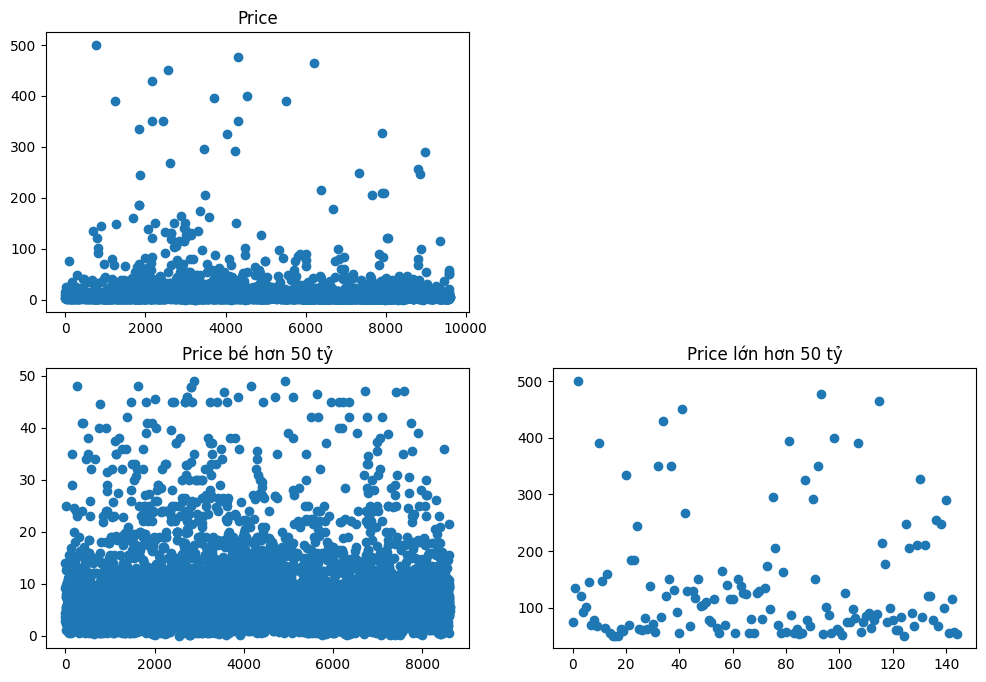

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
ax1.scatter(range(0,len(file['Price'])), file['Price'])
ax1.set_title('Price')
ax2.scatter(range(0,len(t['Price'])), t['Price'])
ax3.set_title('Price lớn hơn 50 tỷ')
ax3.scatter(range(0,len(s['Price'])), s['Price'])
ax2.set_title('Price bé hơn 50 tỷ')

#### ***Datetime***

> **Vấn đề:**
*   Dữ liệu "*Datetime*" có dạng yyyy-mm-dd hh:mm:ss dài dòng không cần thiết.

> **Giải quyết:**
*   Cập nhật dữ liệu "*Datetime*" từ *yyyy-mm-dd hh:mm:ss* thành *yyyy*

In [ ]:
def Date(x):
    return x[0:4]
file['Datetime']=file['Datetime'].apply(Date)
_ = pd.to_numeric(file['Datetime'])

#### ***Convert house address into Longitude - Latitude coordinates***

In [ ]:
from geopy.geocoders import Nominatim
file['Address'] = file['District'].loc[:].astype(str)+', '+file['City'].loc[:]
df_temp = file['Address'].unique()
locator = Nominatim(user_agent="myGeocoder",timeout=3)
list_longitude = []
list_latitude = []
for x in range(len(df_temp)):
    list_longitude.append(locator.geocode(df_temp[x]).longitude)
    list_latitude.append(locator.geocode(df_temp[x]).latitude)

In [ ]:
Longitude = []
Latitude = []
for m in range(len(file.Address)):
    for n in range(len(df_temp)):
        if file.Address[m] == df_temp[n]:
            Longitude.append(list_longitude[n])
            Latitude.append(list_latitude[n])

In [ ]:
file['Longitude'] = Longitude
file['Latitude'] = Latitude

In [ ]:
file = file.drop(columns = 'Address', axis=1)

In [ ]:
file.to_csv('Data_geography.csv', encoding = 'utf-8', index = False)

### **3.2.2. Xử lí Missing value**


> Sử dụng file dữ liệu đã được làm sạch 'Data_geography.csv'



In [ ]:
file = pd.read_csv('Data_geography.csv')

In [ ]:
file.isnull().sum()

Datetime               0
Acreage              799
TotalFloor             0
TotalBedroom        1986
TotalBathroom       3093
HouseUtilities         0
HouseMinusPoint        0
RoomMultipurpose       0
OuterUtilities         0
HouseType              0
Direction           8410
City                   0
District               0
Price                836
Longitude              0
Latitude               0
dtype: int64

Biểu đồ Heatmap trực quan các cột có giá trị Null.

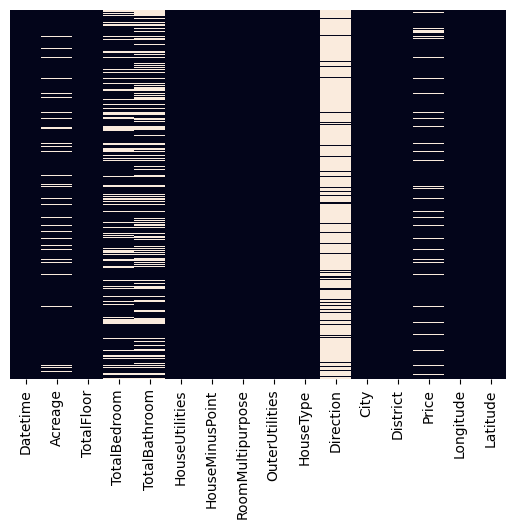

In [ ]:
_ = sns.heatmap(file.isnull(),yticklabels=False,cbar=False)

#### ***Drop unnessary columns.***

Heatmap trên cho thấy cột Direction có hơn 80% missing values nên
ta sẽ drop cột Direction.

In [ ]:
file.drop(columns = 'Direction', axis=1, inplace=True)

#### ***Filling missing values using MICE***

In [ ]:
file.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,9123.0,NaN,NaN,NaN,4814.671599,2775.781119,0.0,2418.5,4791.0,7243.5,9595.0
Datetime,9123.0,NaN,NaN,NaN,2022.581717,0.493304,2022.0,2022.0,2023.0,2023.0,2023.0
Acreage,8797.0,NaN,NaN,NaN,108.77849,1573.510665,8.0,44.0,60.0,85.0,105119.0
TotalFloor,9123.0,NaN,NaN,NaN,3.577222,3.174187,1.0,1.0,3.0,5.0,85.0
TotalBedroom,7331.0,NaN,NaN,NaN,3.762106,3.673903,1.0,2.0,3.0,4.0,111.0
TotalBathroom,6304.0,NaN,NaN,NaN,3.566148,3.90333,1.0,2.0,3.0,4.0,111.0
HouseUtilities,9123.0,NaN,NaN,NaN,2.999233,2.418616,0.0,1.0,2.0,4.0,23.0
HouseMinusPoint,9123.0,NaN,NaN,NaN,0.095035,0.354846,0.0,0.0,0.0,0.0,3.0
RoomMultipurpose,9123.0,NaN,NaN,NaN,0.918777,1.157931,0.0,0.0,1.0,2.0,10.0
OuterUtilities,9123.0,NaN,NaN,NaN,4.358983,2.874357,0.0,2.0,4.0,6.0,28.0


In [ ]:
file.shape

(9123, 16)

In [ ]:
file.isnull().sum()

index                  0
Datetime               0
Acreage              326
TotalFloor             0
TotalBedroom        1792
TotalBathroom       2819
HouseUtilities         0
HouseMinusPoint        0
RoomMultipurpose       0
OuterUtilities         0
HouseType              0
City                   0
District               0
Price                363
Longitude              0
Latitude               0
dtype: int64

**Quan sát dữ liệu trên, ta thấy:**
- Một số vùng ngoại ô, tỉnh lẻ; với diện tích đất khá nhỏ, dưới 200m2; nhưng có giá trên 50 tỷ đồng.
- Một số vùng thuộc các thành phố lớn, có diện tích phù hợp, nhưng có giá dưới 500 triệu đồng.
- Một số căn nhà có diện tích dưới 10m2.
- 'TotalFloor' > 30 (Với giá tiền <= 500 tỷ đồng, không thể nào tồn tại căn nhà có 85 tầng được).
- 'TotalBedroom' > 100 & 'Price' < 100 tỷ.


In [ ]:
print(file.shape)
cond1 = (file['Price'] >= 50) & (file['Acreage'] <= 200) & (~file['District'].isin(['Hoàn Kiếm', 'Ba Đình', 'Cầu Giấy', 'Tây Hồ', 'Quận 1']))
cond2 = (file['Price'] <= 0.5) & (file['City'].isin(['TP Hồ Chí Minh', 'Đà Nẵng', 'Hà Nội','Cần Thơ','Đồng Nai','Bà Rịa Vũng Tàu']))
cond3 = file['Acreage'] <= 10
cond4 = file['TotalFloor'] > 30
cond5 = (file['TotalBedroom'] > 100) & (file['Price'] < 100)
# Loại bỏ các hàng không hợp lệ
file=file[~cond1 & ~cond2 & ~cond3 & ~cond4 &~cond5]
print(file.shape)

(9596, 15)
(9473, 15)


In [ ]:
x=file.select_dtypes(include=[float, int]).columns
df_missing=file[x].copy()

##### **MICE forest**

MICE forest (Multiple Imputations by Chained Equations forest) là một phương pháp imputation based on random forests cho phép impute dữ liệu hiệu quả trong trường hợp các biến số có tương tác phức tạp. Một Dự án MICE forest bao gồm các bước sau:

Bước 1: Tiền xử lý dữ liệu và chọn biến:
- Xử lý dữ liệu bị khuyết: Thay thế các giá trị bị khuyết bằng giá trị ban đầu hoặc trung bình của biến đó (nếu có).
- Chuẩn hóa dữ liệu (nếu cần): Chuẩn hóa dữ liệu để đảm bảo các biến đều ở trong khoảng giá trị tương đương để giảm thiểu ảnh hưởng của các phương sai không đồng nhất.
- Chọn biến: Lựa chọn số lượng biến cần impute dựa trên số lượng giữ liệu bị thiếu tương ứng với mỗi biến.

Bước 2: Xây dựng model:
- Các model Rạng buộc ngẫu nhiên được xây dựng cho từng biến cần được impute dựa trên dữ liệu không bị khuyết. Các model này sẽ học cách dự đoán biến cần được impute dựa trên các biến còn lại.
- Sử dụng các model được xây dựng để dự đoán các giá trị bị khuyết của các biến cần được impute.
- Sử dụng các giá trị đã được dự đoán để tạo ra nhiều bản sao của dữ liệu bị khuyết.

Bước 3: Tính toán giá trị imputation cho mỗi biến khuyết:
- Mỗi bản sao được thực hiện imputations cho biến cần được impute đối với các giá trị bị khuyết.
- Tính tổng của tất cả các imputations để có được giá trị cuối cùng cho giá trị bị khuyết của biến đó.
- Lưu lại giá trị imputation cho từng bản sao.

Bước 4: Kết hợp các bản sao dữ liệu:
- Sau khi hoàn thành bước 3 cho tất cả các biến cần được impute, ta chọn giá trị impute cuối cùng bằng cách sử dụng trọng số đối với các từng bản sao dữ liệu để tạo thành một bộ dữ liệu hoàn chỉnh với đầy đủ các giá trị bị khuyết
- Phương pháp này sử dụng các model Rạng buộc ngẫu nhiên cho các giá trị thiếu để giải quyết các tương tác phức tạp, đồng thời cải thiện tốc độ và hiệu quả của quá trình imputation.





In [ ]:
!pip install miceforest --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 211.9 MB/s eta 0:00:00


In [ ]:
import miceforest as mf
# Create kernel.
kds = mf.ImputationKernel(
  df_missing,
  save_all_iterations=True,
  random_state=42
)

# Run the MICE algorithm for 500 iterations
kds.mice(iterations=500)

# Return the completed dataset.
df_imputed = kds.complete_data()

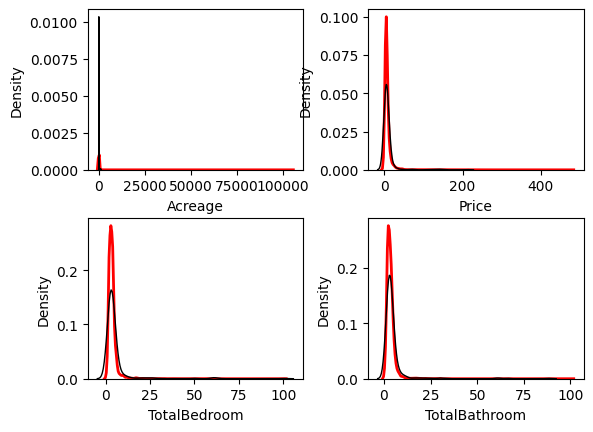

In [ ]:
kds.plot_imputed_distributions(wspace=0.3,hspace=0.3) #500

- Đường màu đen: phân phối của dữ liệu trước khi dùng MICE
- Đường màu đỏ: phân phối của dữ liệu sau khi dùng MICE

In [ ]:
df_imputed

,index,Datetime,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,Price,Longitude,Latitude
0,0,2023,130.0,1,7.0,6.0,4,0,4,4,9.20,106.664209,10.861411
1,1,2023,65.0,1,2.0,2.0,2,0,1,10,2.90,108.262775,16.004020
2,2,2023,90.0,10,5.0,4.0,5,0,4,10,14.00,105.855225,21.012198
3,4,2023,30.0,2,2.0,2.0,3,0,0,4,3.70,106.640304,10.844057
4,5,2023,38.0,9,3.0,3.0,5,0,0,9,4.40,106.698770,10.819914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,9590,2022,62.0,4,5.0,3.0,1,0,1,6,5.38,105.857447,20.975535
9119,9592,2022,208.0,1,3.0,2.0,1,0,0,2,10.80,106.771551,10.831135
9120,9593,2022,54.0,3,3.0,3.0,3,0,1,6,5.50,106.698770,10.819914
9121,9594,2022,110.0,1,2.0,1.0,5,0,0,15,5.50,108.800932,11.710747


In [ ]:
file[x] = df_imputed

In [ ]:
# standard deviation iteration = 1000
print('Standard deviation df_missing vs df_imputed:')
print('Price: ', np.std(df_missing['Price'])-np.std(df_imputed['Price']))
print('Acreage: ', np.std(df_missing['Acreage'])-np.std(df_imputed['Acreage']))
print('TotalBedroom: ',np.std(df_missing['TotalBedroom'])-np.std(df_imputed['TotalBedroom']))
print('TotalBathroom: ',np.std(df_missing['TotalBathroom'])-np.std(df_imputed['TotalBathroom']))
print('')

Standard deviation df_missing vs df_imputed:
Price:  -0.19649165117106548
Acreage:  28.76115616095467
TotalBedroom:  -1.5176988436857752
TotalBathroom:  -1.5091384830724022



In [ ]:
file.isnull().sum()

index               0
Datetime            0
Acreage             0
TotalFloor          0
TotalBedroom        0
TotalBathroom       0
HouseUtilities      0
HouseMinusPoint     0
RoomMultipurpose    0
OuterUtilities      0
HouseType           0
City                0
District            0
Price               0
Longitude           0
Latitude            0
dtype: int64

#### ***Find out outliers and drop***

In [ ]:
Q1, mean, Q3 = file['Price'].quantile([0.25,0.50,0.75])
IQR = Q3 - Q1
High = Q3+1.5*IQR
Low = Q1-1.5*IQR
Q1, mean, Q3, IQR, High, Low

(3.6, 5.3, 7.935, 4.334999999999999, 14.437499999999998, -2.9024999999999985)

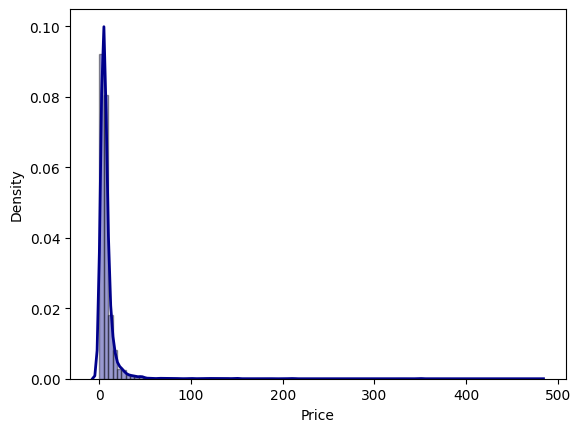

In [ ]:
sns.distplot(file['Price'],
             hist = True,
             bins=int(100),
             kde = True,
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2})
plt.show()

In [ ]:
Q1, mean, Q3 = file['Acreage'].quantile([0.25,0.50,0.75])
IQR = Q3 - Q1
High = Q3+1.5*IQR
Low = Q1-1.5*IQR
Q1, mean, Q3, IQR, High, Low

(44.0, 60.0, 85.0, 41.0, 146.5, -17.5)

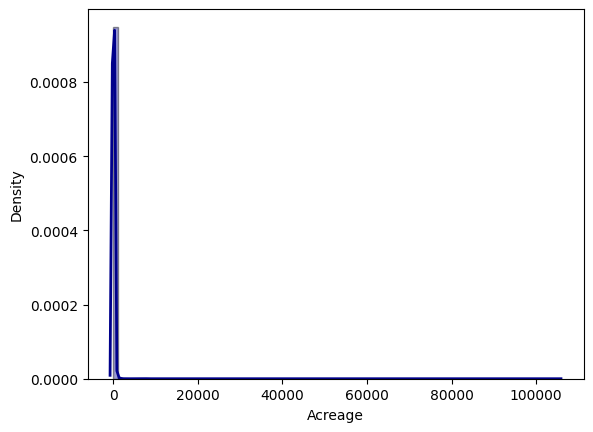

In [ ]:
sns.distplot(file['Acreage'],
             hist = True,
             bins=int(100),
             kde = True,
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':2})
plt.show()

In [ ]:
file[file['Price']>300]

,index,Datetime,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType,City,District,Price,Longitude,Latitude
1152,1243,2023,1209.0,1,61.0,61.0,1,0,0,0,Bán Nhà mặt phố,Hà Nội,Long Biên,390.0,105.892153,21.025707
2031,2152,2023,550.0,22,38.0,61.0,6,0,0,5,Bán Nhà mặt phố,Hà Nội,Cầu Giấy,350.0,105.803438,21.029165
2305,2443,2023,550.0,22,61.0,88.0,6,0,0,5,Bán Nhà mặt phố,Hà Nội,Cầu Giấy,350.0,105.803438,21.029165
4087,4304,2023,1470.0,22,65.0,66.0,2,0,0,4,Bán Nhà mặt phố,Hà Nội,Hoàn Kiếm,350.0,105.845588,21.027059
4106,4323,2023,950.0,6,12.0,5.0,2,0,0,4,Bán Luxury home,TP Hồ Chí Minh,Quận 1,477.0,106.699573,10.775260
7460,7907,2022,622.0,9,50.0,88.0,6,0,1,8,Bán Nhà mặt phố,Hà Nội,Cầu Giấy,328.0,105.803438,21.029165


In [ ]:
file[file['Acreage']>5000]

,Datetime,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType,City,District,Price,Longitude,Latitude
1876,2023,7255.0,4,61.0,100.0,1,0,0,1,Bán Nhà mặt phố,TP Hồ Chí Minh,Quận 7,126.00,106.729713,10.737755
1922,2023,7255.0,6,5.0,6.0,3,0,0,5,Bán Nhà riêng,Hà Nội,Long Biên,12.00,105.892153,21.025707
2112,2023,18264.0,2,3.0,3.0,2,0,0,3,Bán Nhà mặt phố,Tiền Giang,Châu Thành,2.11,106.272274,10.421505
3056,2023,10400.0,1,33.0,88.0,4,0,0,3,Bán Nhà riêng,Đồng Nai,Định Quán,14.50,107.313877,11.209968
4575,2023,7770.0,6,4.0,3.0,0,0,1,6,Bán Nhà riêng,TP Hồ Chí Minh,Bình Tân,7.86,106.652276,10.803066
5284,2023,10196.0,1,3.0,2.0,0,0,1,1,Bán Nhà,Đắk Lắk,Krông Pắc,1.00,108.309304,12.709765
6469,2022,7770.0,2,38.0,100.0,3,0,0,6,Bán Nhà mặt phố,Tiền Giang,Châu Thành,150.00,106.272274,10.421505
6803,2022,100103.0,1,26.0,30.0,3,0,1,1,Bán Nhà,Bà Rịa Vũng Tàu,Xuyên Mộc,100.00,107.422576,10.610034
8118,2022,105119.0,1,28.0,30.0,6,0,1,1,Bán Nhà riêng,Thừa Thiên Huế,Huế,115.00,107.586339,16.463932


Drop những hàng có
Outliers
- 'Price' <= 0.5
- 'Acreage' <= 10 or 'Acreage' >= 7000
- 'TotalBedroom' <=0
- 'TotalBathroom' <=0

In [ ]:
#Xoá các hàng thỏa điều kiện
mask = ((file['Price'] <= 0.5)
       | (file['Acreage'] <= 10) | (file['Acreage'] >= 7000)
       | (file['TotalBedroom'] <= 0) | (file['TotalBathroom'] <= 0))
file1 = file.drop(index=file[mask].index)

In [ ]:
file1.shape

(8980, 16)

In [ ]:
file1 = file1.drop(columns = 'index')

In [ ]:
file1.to_csv('Data_for_model.csv', encoding = 'utf-8', index = False)

### **3.2.3. Visualie Heatmap using Kernel Density Estimation**

Kernel Density Estimation là một công cụ thống kê, thường được viết tắt là KDE, đây là một kỹ thuật để ước tính hàm mật độ xác suất, cho phép người dùng có cái nhìn tốt hơn về hàm mật độ xác suất của tập dữ liệu đang nghiên cứu so với khi sử dụng biểu dồ histogram truyền thống.

Các bước thực hiện:
1. Thu thập dữ liệu:

  Để có thể trực quan hoá Heatmap, trước hết cần chuyển đổi địa chỉ ngôi nhà về dạng toạ độ địa lý (kinh độ, vĩ độ).

2. Xác định độ rộng của kernel (h):

  Độ rộng của kernel quyết định độ chính xác của Kernel Density Estimation. Nếu h quá lớn, các kernel sẽ chồng lên nhau và kết quả sẽ thiếu chính xác. Nếu quá nhỏ, phân bố dữ liệu sẽ không được xác định rõ ràng. Đồng thời, giá trị h cũng phụ thuộc vào sự phân bố của dữ liệu.

3. Chọn hàm kernel:

  Kernel là một hàm đã chuẩn hóa có trung tâm tại điểm đang xét. Gaussian kernel là lựa chọn phổ biến để sử dụng trong Kernel Density Estimation.

    $K(x) = \frac{1}{\sigma \sqrt{2\pi}} . e^{\frac{-(x^2)}{2σ^2}}$

>- x là khoảng cách tính từ điểm đang xét.
- sigma là độ lệch chuẩn của phân phối xác suất.
- sigma is the standard deviation of the probability distribution
- pi là hằng số pi, xấp xỉ bằng 3.14

4. Tính toán Kernel Density Estimation:

  Để tính toán Kernel Density Estimation, ta cần tính toán giá trị kernel với mỗi điểm trong tập dữ liệu, sau đó tính tổng giá trị kernel của tất cả các điểm dữ liệu đó.

  $f(x) = \frac{1}{n} \displaystyle \sum_{i = 1}^{n}K\bigg(\frac{x - X_i}{h}\bigg)$

5. Trực quan hóa kết quả:

  Mật độ Kernel được tính toán dựa trên số lượng điểm tập trung trong một khu vực, số lượng điểm trong nhóm càng lớn thì giá trị mật độ càng lớn. Bản đồ nhiệt Heatmap giúp đưa ra cái nhìn trực quan, dễ dàng xác định các điểm nóng và phân cụm của các điểm dữ liệu.

Kỹ thuật này có thể rất hữu ích nếu ta chỉ muốn trực quan hóa “hình dạng” của dữ liệu, như một kiểu thay thế liên tục cho một tập dữ liệu rời rạc. Kernel Density Estimation cũng có thể được sử dụng để tạo ra các điểm mà trông chúng như đến từ một tập dữ liệu nhất định - việc này có thể hỗ trợ cho các mô phỏng đơn giản mà trong đó các giá trị mô phỏng được mô hình hóa từ dữ liệu thực.

> Visualize Heatmap using Geopandas and Geoplot



Sử dụng dữ liệu từ file geojson để vẽ bản đồ Việt Nam

In [ ]:
vn_path = 'https://raw.githubusercontent.com/Vizzuality/growasia_calculator/master/public/vietnam.geojson'
vietnam = gpd.read_file(vn_path)
vietnam.head()

,cartodb_id,id_1,name,slug,geometry
0,17,33,Kiên Giang,vietnam-kiengiang,"MULTIPOLYGON (((105.40141 10.04024, 105.53898 ..."
1,62,49,Quảng Ninh,vietnam-quangninh,"MULTIPOLYGON (((106.53680 21.05216, 106.43977 ..."
2,47,11,Bình Phước,vietnam-binhphuoc,"MULTIPOLYGON (((106.75164 11.46867, 106.70483 ..."
3,44,12,Bình Thuận,vietnam-binhthuan,"MULTIPOLYGON (((107.50771 11.01104, 107.39390 ..."
4,26,18,Cà Mau,vietnam-camau,"MULTIPOLYGON (((105.26105 9.17828, 105.28011 9..."


In [ ]:
vietnam.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
data = pd.read_csv('Data_for_model.csv')
data_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
data_gdf.head()

,Datetime,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType,City,District,Price,Longitude,Latitude,geometry
0,2023,130.0,1,7.0,6.0,4,0,4,4,Bán Nhà riêng,TP Hồ Chí Minh,Quận 12,9.2,106.664209,10.861411,POINT (106.66421 10.86141)
1,2023,65.0,1,2.0,2.0,2,0,1,10,Bán Nhà riêng,Đà Nẵng,Ngũ Hành Sơn,2.9,108.262775,16.004020,POINT (108.26277 16.00402)
2,2023,90.0,10,5.0,4.0,5,0,4,10,Bán Nhà riêng,Hà Nội,Hai Bà Trưng,14.0,105.855225,21.012198,POINT (105.85522 21.01220)
3,2023,30.0,2,2.0,2.0,3,0,0,4,Bán Nhà riêng,TP Hồ Chí Minh,Gò Vấp,3.7,106.640304,10.844057,POINT (106.64030 10.84406)
4,2023,38.0,9,3.0,3.0,5,0,0,9,Bán Nhà riêng,TP Hồ Chí Minh,Bình Thạnh,4.4,106.698770,10.819914,POINT (106.69877 10.81991)


In [ ]:
# explode MultiPolygons into individual Polygons
vietnam = vietnam.buffer(0.000001).explode()

# world map
ax = gplt.polyplot(vietnam, projection=gcrs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='#DDEEFF', linewidth=.3, figsize=(12, 8), zorder=1)

# kernel density estimate plot
gplt.kdeplot(df=data_gdf, cmap='Reds', shade=True, alpha=0.8, clip=vietnam, figsize=(16, 8), ax=ax)

# geospatial scatter plot
gplt.pointplot(df=data_gdf, s=1, color='lightblue', ax=ax)

plt.title('Heatmap using Kernel Density Estimation');

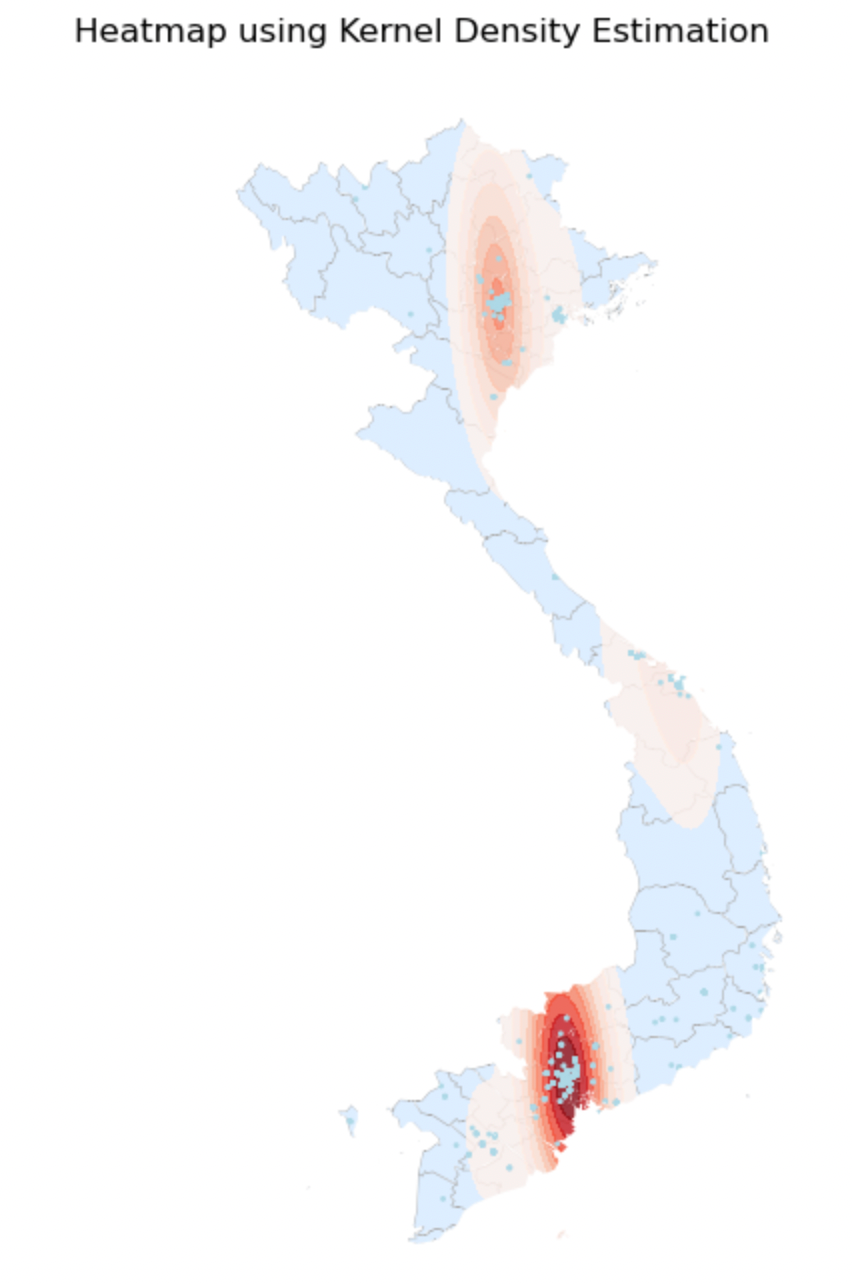

> Visualize Heatmap using Basemap



In [ ]:
!pip install basemap "basemap-data-hires == 1.3.0b1"
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

In [ ]:
dt = data.drop(columns=['Acreage','TotalFloor','TotalBedroom','TotalBathroom','HouseUtilities'
                     ,'HouseMinusPoint','RoomMultipurpose','OuterUtilities','HouseType','City','District'])

In [ ]:
# Get matrices/arrays of houses IDs and locations
latlon = np.vstack([dt['Longitude'].values,dt['Latitude'].values]).T
times = np.array([d == 2023 for d in dt['Datetime']], dtype='int')

In [ ]:
grid_size = 0.01
x_left_lower_corner = 101
Nx = 950
y_left_lower_corner = 8
Ny = 1550

In [ ]:
xmin = x_left_lower_corner + grid_size
xmax = xmin + (Nx * grid_size)

ymin = y_left_lower_corner + grid_size
ymax = ymin + (Ny * grid_size)

xgrid = np.arange(xmin, xmax, grid_size)
ygrid = np.arange(ymin, ymax, grid_size)

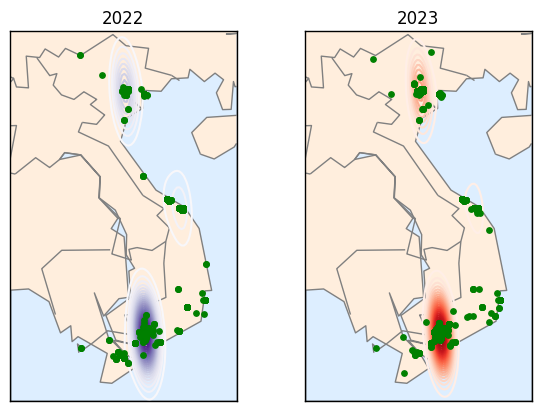

In [ ]:
# Create two side-by-side plots
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
year = [2022, 2023]
cmaps = ['Purples', 'Reds']

# Create a grid of points to evaluate the KDE
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])

for i, axi in enumerate(ax):
    axi.set_title(year[i])

    # plot coastlines with basemap
    m = Basemap(projection='cyl', resolution='c', llcrnrlat=ymin, urcrnrlat=ymax, llcrnrlon=xmin, urcrnrlon=xmax, ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.fillcontinents(color='#FFEEDD')
    m.drawcoastlines(color='gray', zorder=2, linewidth=1)
    m.drawcountries(color='gray', zorder=2, linewidth=1)

    # Calculate the kernel density estimate of the points
    kde = gaussian_kde(latlon[times == i].T)

    # Evaluate the KDE at the grid points
    xy = np.vstack([latlon[times == i][:, 0], latlon[times == i][:, 1]])
    z = gaussian_kde(xy)(xy)
    density = kde(positions).reshape(xx.shape)

    # plot point density
    m.scatter(latlon[times == i][:, 0], latlon[times == i][:, 1], s=15, latlon=True, zorder=3, color='green')

    # plot contours of the density
    levels = np.linspace(0, z.max(), 25)
    m.contour(xx, yy, density, levels=levels, cmap=cmaps[i])

## **3.3. Feature Engineering**

### **3.3.1. Encoding categorical variables**

> **Encoding categorical variables**

*Mã hóa dữ liệu phân loại* là một quá trình chuyển đổi dữ liệu thành định dạng số nguyên.

**[Để](https:// [văn bản liên kết](https://))** có thể sử dụng các categorical variables trong mô hình máy học, các biến phân loại này này cần được mã hoá thành các giá trị số mà mô hình có thể tiếp nhận và xử lý.

Binary Encoder là một kỹ thuật dùng để mã hoá các biến phân loại này.
1. Đầu tiên các biến phân loại (categorical feature) sẽ được đưa về dạng số bằng cách sử dụng Ordinal Encoder, có nghĩa là mỗi giá trị phân loại sẽ được gán với một giá trị nguyên tương ứng.
2. Sau đó, các giá trị số này sẽ được chuyển đổi sang dạng mã nhị phân, ví dụ, 3 tương ứng với 011, 4 tương ứng với 100.
3. Log(n) cột mới sẽ được tạo ra tương ứng với số chữ số của các giá trị nhị phân, với n là số giá trị của biến phân loại. Các mã nhị phân sẽ được ánh xạ lên các cột này sử dụng 0 và 1, tương tự như cách biểu diễn số nhị phân.

Khi biến phân loại có một lượng lớn giá trị unique, Binary Encoder là phương pháp mã hoá tốt và tiết kiệm bộ nhớ hơn, do nó tạo ra ít thuộc tính mới hơn (log(n) new features) so với kỹ thuật khác như One-hot Encoder (n new features).

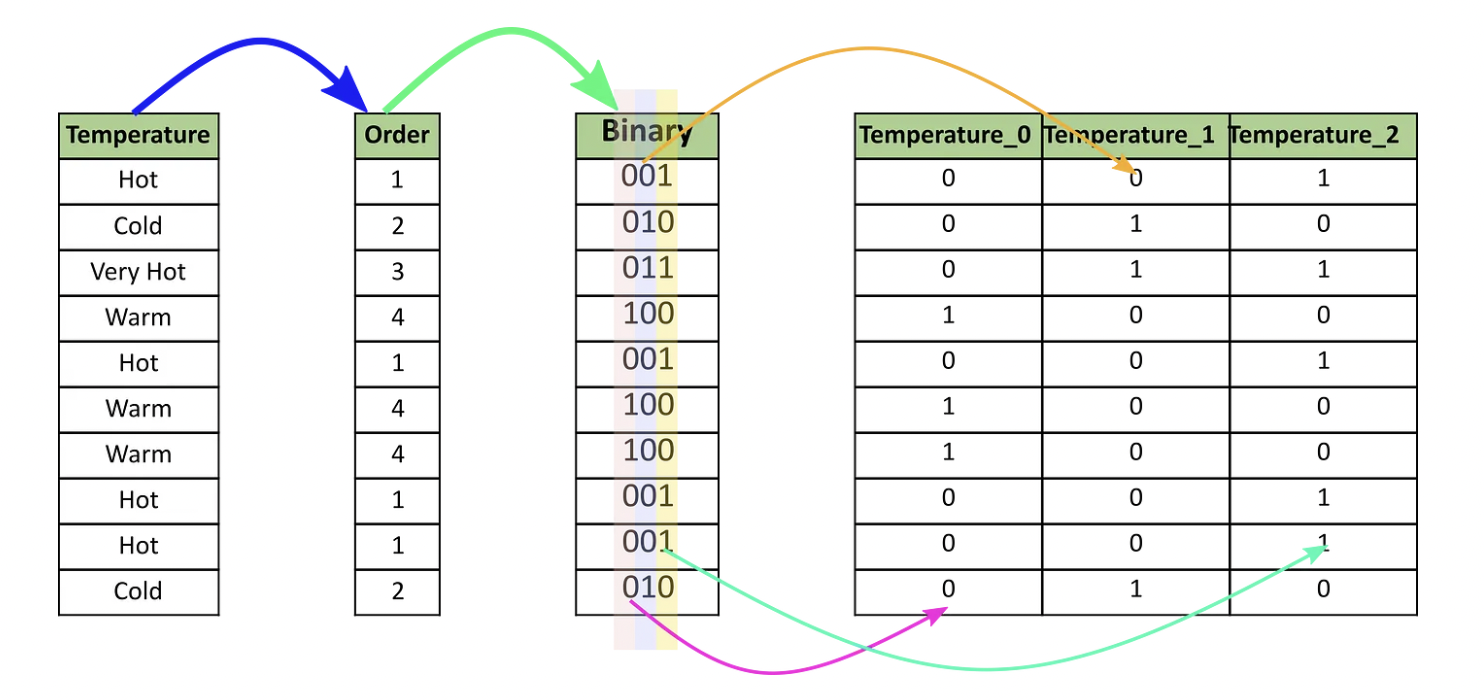


In [ ]:
geography = pd.read_csv('Data_for_model.csv')
geography = geography.drop(columns = ['City', 'District'])

In [ ]:
encoder = ce.BinaryEncoder(cols=['HouseType','Datetime'],return_df=True)
data_encoded = encoder.fit_transform(geography)
data_encoded.head()

,Datetime_0,Datetime_1,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType_0,HouseType_1,HouseType_2,Price,Longitude,Latitude
0,0,1,130.0,1,7.0,6.0,4,0,4,4,0,0,1,9.2,106.664209,10.861411
1,0,1,65.0,1,2.0,2.0,2,0,1,10,0,0,1,2.9,108.262775,16.004020
2,0,1,90.0,10,5.0,4.0,5,0,4,10,0,0,1,14.0,105.855225,21.012198
3,0,1,30.0,2,2.0,2.0,3,0,0,4,0,0,1,3.7,106.640304,10.844057
4,0,1,38.0,9,3.0,3.0,5,0,0,9,0,0,1,4.4,106.698770,10.819914


### **3.3.2. Findout important features for our model**

***Price*** là *target values*

In [ ]:
X=data_encoded.drop(['Price'],axis=1)
y=data_encoded[['Price']].values.reshape(-1,1)

In [ ]:
X.shape, y.shape

((8980, 15), (8980, 1))

Extra Trees Regression là một thuật toán machine learning thuộc họ thuật toán Decision Tree. Nó là một phương pháp ensemble learning dựa trên Decision Tree. Trong Extra Trees Regression, nhiều Decision Tree được xây dựng bằng cách sử dụng phân tách ngẫu nhiên dữ liệu huấn luyện. Những cây này được phát triển cho đến khi đạt được số lượng nút tối đa hoặc số lượng mẫu tối thiểu cần thiết để tách một nút.

Đầu tiên, một tập hợp các cây quyết định được xây dựng bằng cách chọn ngẫu nhiên các tập hợp con từ dữ liệu huấn luyện và chọn các tính năng ngẫu nhiên để phân tách. Đối với mỗi cây, các bước sau đây được thực hiện:
- Decision Tree được tạo bằng cách chia dữ liệu thành hai tập hợp con khác nhau với điểm phân tách được chọn ngẫu nhiên.

- Dự đoán sau đó được thực hiện bằng cách sử dụng các giá trị nút lá trên dữ liệu đầu vào mới, trong đó đạt được nút lá bằng cách thực hiện theo các phần tách được xác định trong Decision Tree.

- Khi một tập hợp các cây đã được tạo, dự đoán cuối cùng được thực hiện bằng cách lấy trung bình các dự đoán riêng lẻ của tất cả các cây được tạo.


Các bước trên có thể được biểu diễn dưới dạng toán học như sau:

Đặt $X$ là các tính năng đầu vào và $Y$ là biến đầu ra.

Tạo tập cây quyết định $T$ = {$T_1$, $T_2$, ..., $T_n$}

Với mỗi cây $T_i \in T$:
- Chọn ngẫu nhiên một tập con $S$ của dữ liệu huấn luyện
- Chọn ngẫu nhiên một tập hợp các tính năng $F_i$ để chia nhỏ
- Tạo cây quyết định Ti sử dụng tập con $S$ đã chọn và các tính năng $F_i$

Đối với đầu vào mới $x$, hãy lấy giá trị dự đoán bằng cách lấy trung bình các dự đoán của tất cả các Decision Tree trong tập $T$:

$\hat{y} = \frac{1}{n} . \displaystyle \sum_{i = 1}^{n} T_i(x) $

Trong các phương trình trên, $T_i(x)$ biểu thị đầu ra dự đoán của cây thứ $i$ cho đầu vào $x$ và $n$ biểu thị số lượng cây trong tập hợp $T$.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.01035439 0.00969863 0.1812032  0.04411103 0.24048203 0.23337836
 0.03054228 0.01831397 0.03391663 0.03447153 0.02827854 0.02118204
 0.0324591  0.03278425 0.04882404]


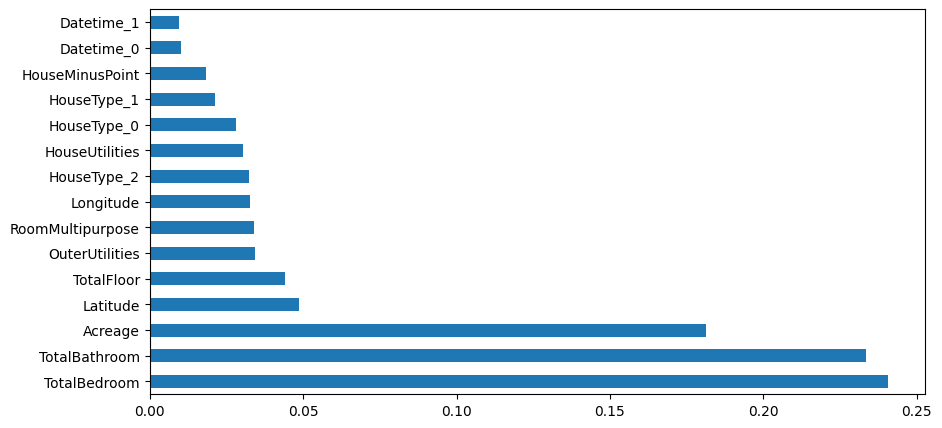

In [ ]:
plt.figure(figsize=(10,5))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

Top 10 features for model:
1.   TotalBedroom
4.   TotalBathroom
2.   Acreage
3.   Latitude
5.   TotalFloor
6.   OuterUtilities
7.   RoomMultipurpose
8.   Longitude
9.   HouseType_2
10.  HouseUtilities



## **3.4. Building Model**

### **3.4.1. Splitting data for trainning (90%) and testing (10%)**

In [ ]:
#input features for model
X = data_encoded.drop(['Price'], axis=1)
#output features for model
y = data_encoded['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=21)

###**3.4.2. Scaling numerical features**

> **Feature Scaling** là một kỹ thuật tiền xử lý dữ liệu liên quan đến việc chuyển đổi giá trị của các features trong dataset sang tỷ lệ tương tự nhau để đảm bảo rằng tất cả các features đóng góp cho mô hình là như nhau, hạn chế over-fitting.



A value is normalized as MinMaxScaler:

${x_{scale}}$=$\frac{x - x_{min}}{x_{max} - x_{min}}$

Bằng cách đó, tất cả các đối tượng sẽ nằm trong phạm vi $[0,1]$ có nghĩa là giá trị tối thiểu và tối đa của một biến sẽ lần lượt là 0 và 1.

In [ ]:
cols_scal = ['Acreage','TotalBedroom','TotalBathroom','TotalFloor','OuterUtilities','HouseUtilities','HouseMinusPoint',	'RoomMultipurpose','Longitude','Latitude']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
X_train[cols_scal]=trans.fit_transform(X_train[cols_scal])
X_test[cols_scal] = trans.transform(X_test[cols_scal])

In [ ]:
X_train

,Datetime_0,Datetime_1,Acreage,TotalFloor,TotalBedroom,TotalBathroom,HouseUtilities,HouseMinusPoint,RoomMultipurpose,OuterUtilities,HouseType_0,HouseType_1,HouseType_2,Longitude,Latitude
7028,1,0,0.007869,0.172414,0.030303,0.030303,0.173913,0.0,0.1,0.071429,0,0,1,0.694096,0.126221
7661,1,0,0.007040,0.000000,0.050505,0.060606,0.086957,0.0,0.2,0.107143,0,0,1,0.611306,0.875853
7968,1,0,0.007454,0.103448,0.020202,0.010101,0.217391,0.0,0.0,0.178571,0,0,1,0.700216,0.114616
4953,0,1,0.010215,0.103448,0.020202,0.010101,0.000000,0.0,0.1,0.142857,0,0,1,0.701461,0.123676
4187,0,1,0.001933,0.068966,0.020202,0.010101,0.043478,0.0,0.1,0.178571,0,0,1,0.708194,0.121883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,1,0,0.004694,0.034483,0.010101,0.010101,0.130435,0.0,0.1,0.107143,0,0,1,0.702296,0.117877
48,0,1,0.002899,0.000000,0.000000,0.010101,0.086957,0.0,0.0,0.178571,0,1,0,0.702840,0.120632
8964,1,0,0.005384,0.000000,0.030303,0.030303,0.043478,0.0,0.2,0.142857,0,1,0,0.608822,0.880427
5944,1,0,0.019879,0.586207,0.252525,0.292929,0.086957,0.0,0.0,0.250000,0,1,0,0.606338,0.877201


### **3.4.3. Linear Regression**

Hồi quy tuyến tính là một phương pháp thống kê để mô hình hóa mối quan hệ giữa một biến phụ thuộc (thường được ký hiệu là "y") và một hoặc nhiều biến độc lập (thường được ký hiệu là "x").

Nhằm mục đích tìm đường phù hợp nhất xấp xỉ mối quan hệ giữa biến phụ thuộc $y$ và biến độc lập $x$.

Giả định rằng có một mối quan hệ tuyến tính giữa biến phụ thuộc và biến độc lập, nghĩa là y có thể được biểu thị dưới dạng tổ hợp tuyến tính của các biến độc lập x cộng với một số hạng sai số:

$y = β_1x_1 + β_2x_2 + ... + β_nx_n + β_0 + \varepsilon$

Trong đó:
* $β_0$ là số hạng chặn
* $β_1, β_2, ... , β_n$ là các hệ số của các biến độc lập $x_1, x_2, ..., x_n$
* $\varepsilon$ là số hạng sai số.

Mục tiêu là ước tính giá trị của các hệ số sao cho chúng giảm thiểu tổng bình phương chênh lệch giữa giá trị dự đoán và giá trị quan sát của biến phụ thuộc. Đây được gọi là phương pháp bình phương nhỏ nhất.

Các ước tính cho các hệ số ($\hat{β}$) có thể được tính bằng công thức sau:

$\hat{β} = (X^T.X)^{-1}. X^T.Y$

Trong đó:
* $X$ là ma trận của các biến độc lập
* $Y$ là vectơ của các giá trị được quan sát của biến phụ thuộc

Khi các hệ số đã được ước tính, giá trị dự đoán của biến phụ thuộc cho đầu vào mới có thể được tính bằng công thức:

$\hat{y} =  β_1x_1 + β_2x_2 + ... + β_nx_n + β_0$ ,

trong đó $x_1, x_2, ..., x_n$ là giá trị của các biến độc lập cho đầu vào mới.

In [ ]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()
y_test_1 = y_test.copy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lr = LinearRegression()

In [ ]:
lr.fit(X_train_1, y_train_1)

LinearRegression()

In [ ]:
print('R2 score of train data: ', lr.score(X_train_1, y_train_1))
print('R2 score of test data: ', lr.score(X_test_1, y_test_1))

R2 score of train data:  0.43879166014191073
R2 score of test data:  0.459484292533053


In [ ]:
print('MAE of train data: ', mean_absolute_error(lr.predict(X_train_1), y_train_1))
print('MAE of test data: ', mean_absolute_error(lr.predict(X_test_1), y_test_1))

MAE of train data:  4.21526100833457
MAE of test data:  4.080861636971047


In [ ]:
print('MSE of train data: ', mean_squared_error(lr.predict(X_train_1), y_train_1))
print('MSE of test data: ', mean_squared_error(lr.predict(X_test_1), y_test_1))

MSE of train data:  132.04394450893486
MSE of test data:  126.42292846429567


### **Decision Tree**

Decision Tree là một *non-parametric supervised learning method* được sử dụng để *phân loại* và *hồi quy*. Mục tiêu của thuật toán này là tạo ra một mô hình dự đoán giá trị của biến mục tiêu dựa trên quy luật của các data features.

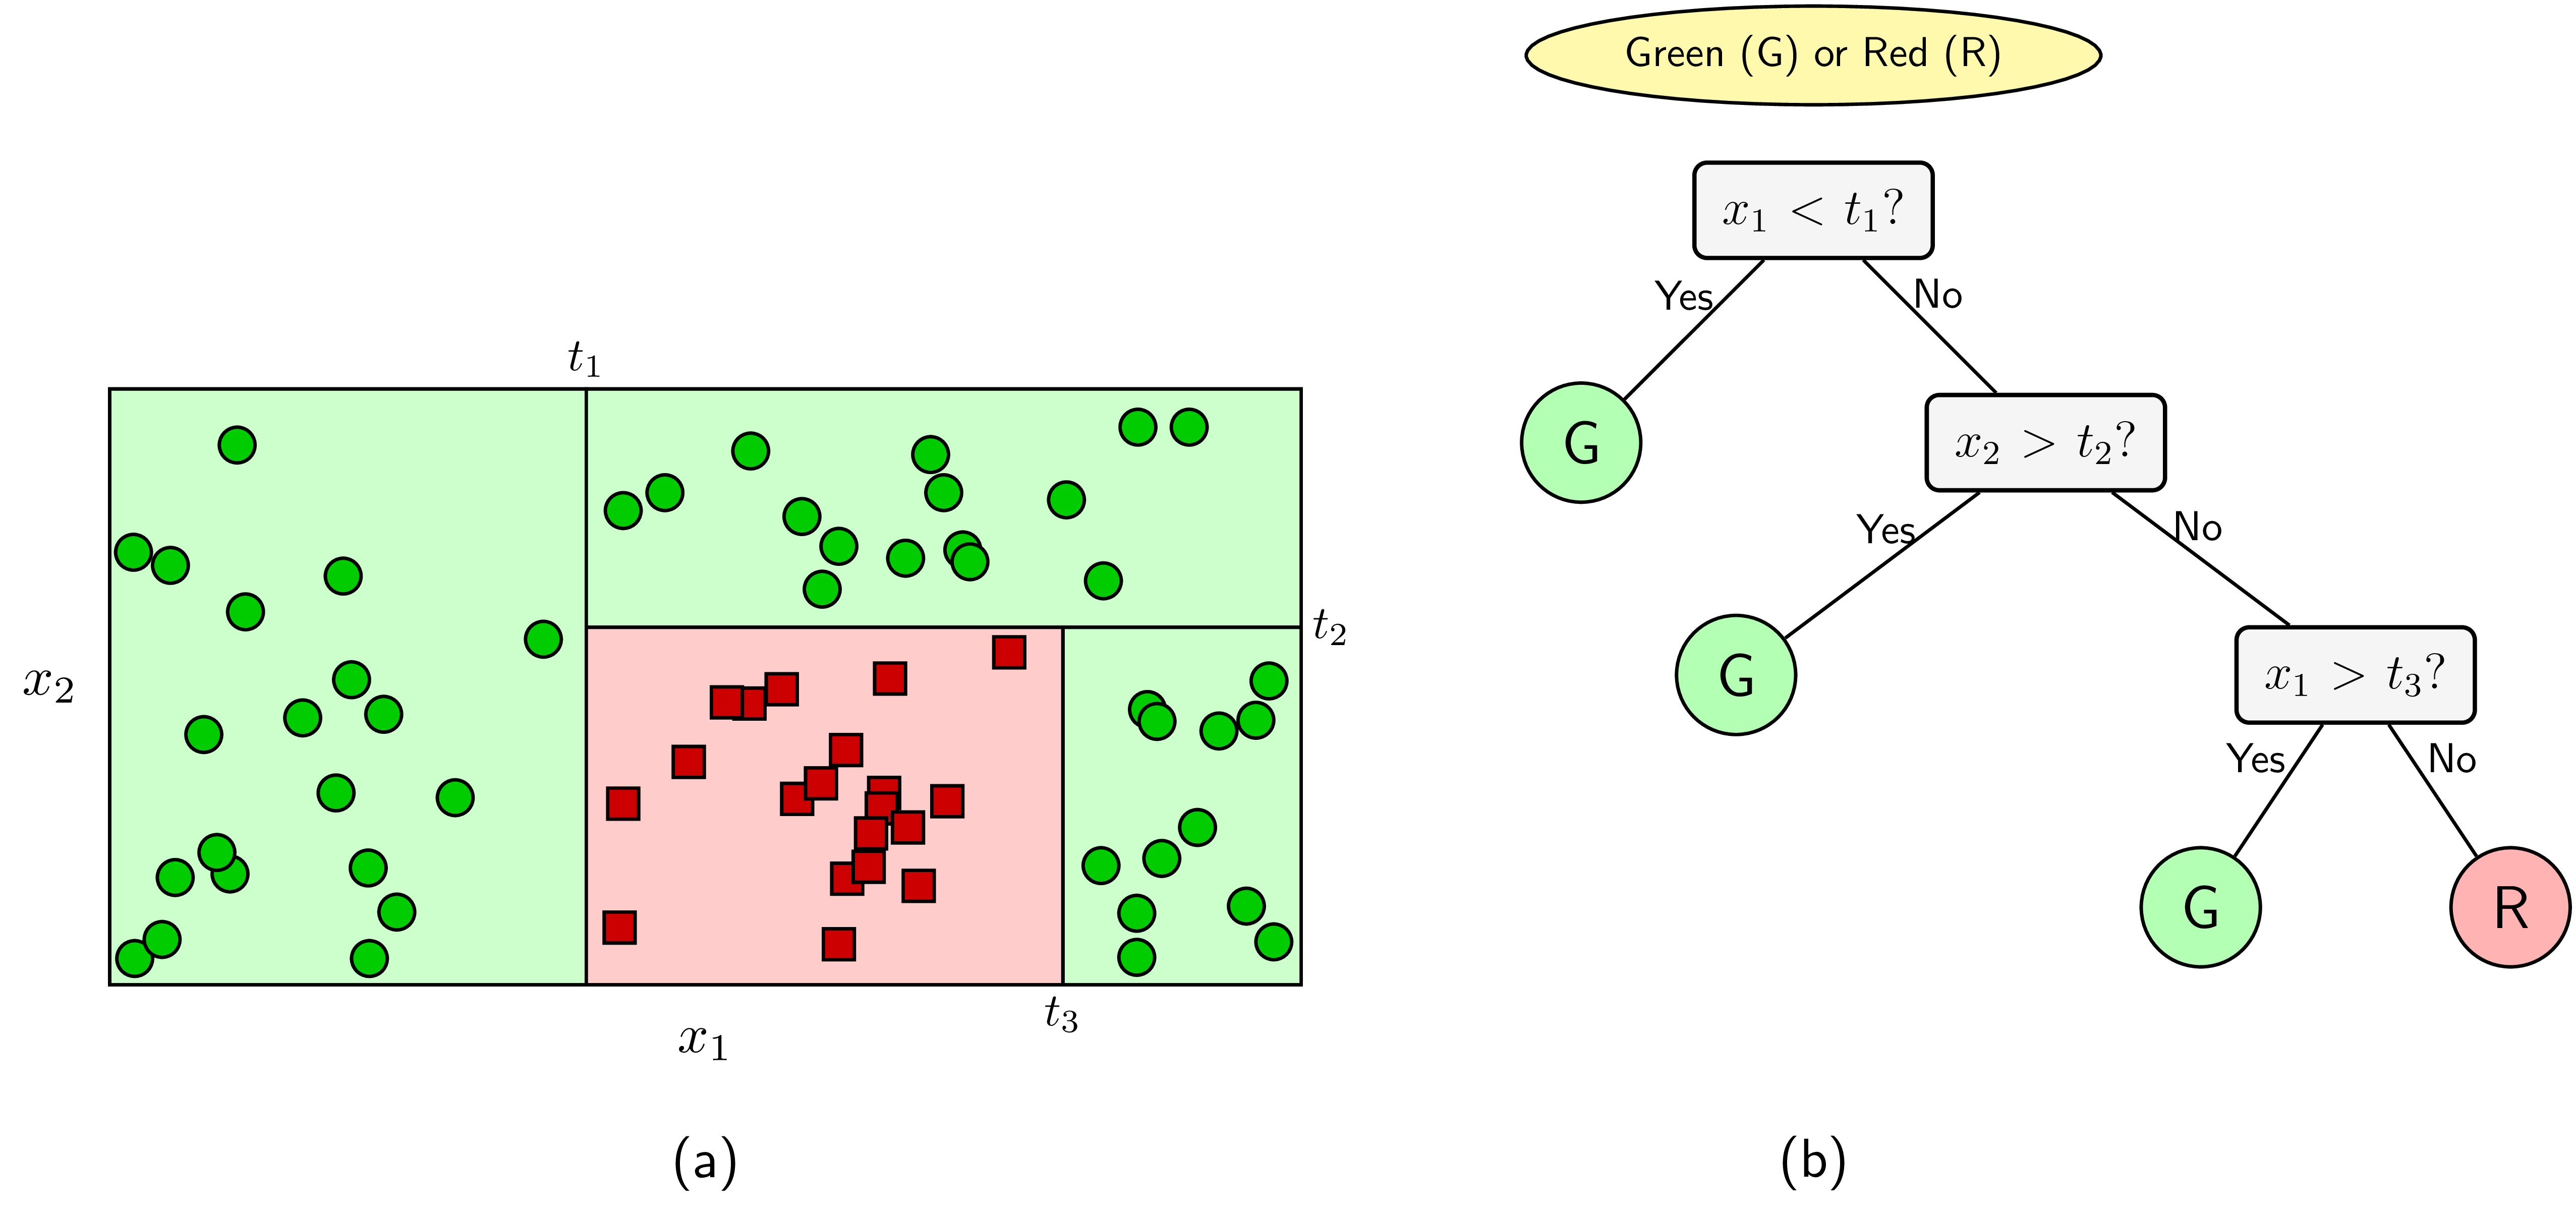

Xây dựng ***Decision Tree*** theo **ID3**

Bài toán xây dựng một decision tree bằng ID3 được chia thành những bài toán nhỏ, trong mỗi bài toán, sẽ phải tìm các cách phân chia các thuộc tính trong một non-leaf node một cách hợp lý sao cho hàm mất mát cuối cùng đạt giá trị nhỏ nhất.

Cho một phân phối xác suất của một biến rời rạc $x$ có thể nhận $n$ giá trị khác nhau $x_1,x_2,…,x_n$. Giả sử rằng xác suất để $x$ nhận các giá trị này là
$p_i = p(x = x_i)$ với $0 ≤ p_i ≤ 1$,
$∑_{i = 1}^n p_i = 1$. Ký hiệu phân phối này là $p = (p_1, p_2,...,p_n)$. Entropy của phân phối này được định nghĩa là



$H(p) = -∑_{i=1}^n p_i log_2{p_i}$



Xét một bài toán với $C$ class khác nhau. Giả sử ta đang làm việc với một non-leaf node với các điểm dữ liệu tạo thành một tập $S$ với số phần tử là
$|S| = N$. Giả sử thêm rằng trong số
$N$ điểm dữ liệu này, $N_c,c =1,2,...,C$ điểm thuộc vào class $c$. Xác suất để mỗi điểm dữ liệu rơi vào một class $c$ được xấp xỉ bằng $\frac{N_c}{N}$ (maximum likelihood estimation). Như vậy, entropy tại node này được tính bởi:

$H(S) = -\sum_{c=1}^{C}\frac{N_c}{N} log(\frac{N_c}{N})$ $(1)$

Tiếp theo, giả sử thuộc tính được chọn là $x$. Dựa trên $x$, các điểm dữ liệu trong $S$ được phân ra thành $K$ child node $S_1, S_2,..., S_k$ với số điểm trong mỗi child node lần lượt là $m_1, m_2,...,m_k$. Ta định nghĩa:

$H(x,S) = \sum_{k=1}^{K} \frac{m_k}{N} H(S_k)$ $(2)$

là tổng có trọng số entroy của mỗi child node–được tính tương tự như $(2)$. Việc lấy trọng số này là quan trọng vì các node thường có số lượng điểm khác nhau.

Tiếp theo, ta định nghĩa $information gain$ dựa trên thuộc tính $x$:

$G(x,S) = H(S) - H(x,S)$

Trong ID3, tại mỗi node, thuộc tính được chọn được xác định dựa trên:

$x^* = argmax_{x} G(x,S) = arg min_{x} H(x,S)$

tức thuộc tính khiến cho $information gain$ đạt giá trị lớn nhất.

Quá trình splitting dừng lại khi:
*   Nếu node đó có entropy bằng 0, tức mọi điểm trong node đều thuộc một class.

*   Nếu node đó có số phần tử nhỏ hơn một ngưỡng nào đó. Trong trường hợp này, ta chấp nhận có một số điểm bị phân lớp sai để tránh overfitting. Class cho leaf node này có thể được xác định dựa trên class chiếm đa số trong node.

*   Nếu khoảng cách từ node đó đến root node đạt tới một giá trị nào đó. Việc hạn chế chiều sâu của tree này làm giảm độ phức tạp của tree và phần nào giúp tránh overfitting.

*   Nếu tổng số leaf node vượt quá một ngưỡng nào đó.

*   Nếu việc phân chia node đó không làm giảm entropy quá nhiều (information gain nhỏ hơn một ngưỡng nào đó).

### **3.4.4. Random Forest**

Thuật toán Random Forest gồm nhiều Decision Tree, mỗi Decision Tree đều có những yếu tố ngẫu nhiên:
- Lấy ngẫu nhiên dữ liệu để xây dựng Decision Tree.
- Lấy ngẫu nhiên các thuộc tính để xây dựng Decision Tree.

Random Forest có 2 dạng là Random Forest Classifier và Random Forest Regression.
- **Random Forest Classifier:** mỗi Decision Tree riêng lẻ sẽ cho ra một kết quả dự doán về lớp (class) mà quan sát của trường dữ liệu đó thuộc vào. Và lớp với số lượng được dự đoán nhiều nhất sẽ là kết quả dự đoán cuối cùng của model.
- **Random Forest Regression:** kết hợp phương pháp ensemble learning với Decision Tree để tạo ra ngẫu nhiên nhiều Decisioin Tree từ bộ dữ liệu ban đầu. Sau đó, tính trung bình các kết quả thu được để đưa ra kết quả dự đoán cuối cùng của model.

Ưu điểm của Random Forest:

Trong thuật toán Decision Tree, khi xây dựng, nếu để độ sâu tùy ý thì cây sẽ phân loại đúng hết các dữ liệu trong tập training dẫn đến mô hình có thể dự đoán tệ trên tập validation/test hay nói cách khác là mô hình bị overfitting hoặc có high variance.
Random Forest sẽ khắc phục được hạn chế này, do mỗi Decision Tree trong thuật toán Random Forest không dùng tất cả dữ liệu training, cũng như không dùng tất cả các thuộc tính của dữ liệu để xây dựng cây. Khi đó, mỗi mô hình Decision Tree có thế bị underfitting, hay nói cách khác là mô hình có high bias. Tuy nhiên, kết quả cuối cùng của thuật toán Random Forest lại tổng hợp từ nhiều cây quyết định, thế nên thông tin từ các cây sẽ bổ sung cho nhau, dẫn đến mô hình có kết quả dự đoán tốt với low bias và low variance.

In [ ]:
X_train_2 = X_train.copy()
X_test_2 = X_test.copy()
y_train_2 = y_train.copy()
y_test_2 = y_test.copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdfr = RandomForestRegressor()

In [ ]:
rdfr.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [ ]:
print('R2 score of train data: ', rdfr.score(X_train_2, y_train_2))
print('R2 score of test data: ', rdfr.score(X_test_2, y_test_2))

R2 score of train data:  0.938085052111285
R2 score of test data:  0.7658053176109741


In [ ]:
print('MAE of train data: ', mean_absolute_error(rdfr.predict(X_train_2), y_train_2))
print('MAE of test data: ', mean_absolute_error(rdfr.predict(X_test_2), y_test_2))

MAE of train data:  1.1262188423980197
MAE of test data:  2.660321198666249


In [ ]:
print('MSE of train data: ', mean_squared_error(rdfr.predict(X_train_2), y_train_2))
print('MSE of test data: ', mean_squared_error(rdfr.predict(X_test_2), y_test_2))

MSE of train data:  14.567662956253251
MSE of test data:  54.77653501900643


### **3.4.5. XGBoost**

XGBoost *(extreme Gradient Boosting)* là một trong những thuật toán machine learning phổ biến và được sử dụng rộng rãi nhất hiện nay vì đơn giản là nó rất mạnh mẽ. Nó tương tự như Gradient Boost nhưng có một vài tính năng bổ sung:
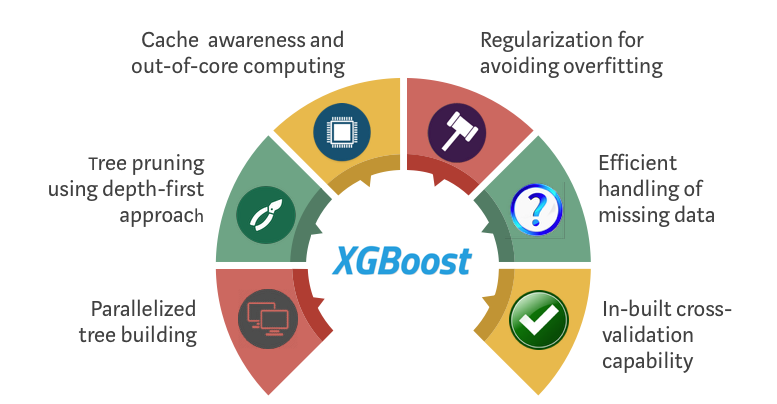





**Extreme Gradient Boosting:**

1.  Xác định giá trị dự đoán ban đầu: Tạo một dự đoán ban đầu cho tất cả các giá trị y bằng giá trị trung bình của các giá trị y.
2.  Tính toán gradient và hessian (đạo hàm bậc hai của hàm mất mát) dựa trên giá trị dự đoán hiện tại của các Decision Tree và các giá trị y tương ứng.
3.  Xây dựng Weak Decision Tree mới để dự đoán giá trị hàm số mất mát.

$f^{(t)}(x)=f^{(t-1)}(x)+γ_th_t(x)$

Trong đó:
*   $f^{(t)}(x)$ là dự đoán của mô hình ở vòng lặp thứ t.
*   $γ_t$ là hệ số tốc độ học (learning rate) ở vòng lặp thứ t.
*   $h_t(x)$ là Weak Decision Tree được xây dựng ở vòng lặp thứ t.

4.  Sử dụng Gradient Descent để tối ưu hóa các tham số của Weak Decision Tree mới dựa trên gradient và hessian tính toán được.

5.  Thêm Weak Decision Tree mới vào mô hình và cập nhật giá trị dự đoán của cây và các giá trị y tương ứng. Nếu đạt được điều kiện dừng, dừng lại.

6.  Lặp lại các bước 2-5 cho đến khi đạt được số lượng Weak Decision Tree cần thiết hoặc đạt được điều kiện dừng.
7.  Tính giá trị dự đoán cuối cùng cho mỗi giá trị của X bằng cách lấy tổng của các giá trị dự đoán của tất cả các Weak Decision Tree.
8.  Trả về mô hình XGBoost đã được ước lượng.

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(random_state = 42, gamma = 0.01)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
print('R2 score of train data: ', model_xgb.score(X_train, y_train))
print('R2 score of test data: ', model_xgb.score(X_test, y_test))

R2 score of train data:  0.9754984419560971
R2 score of test data:  0.8177655353475893


In [ ]:
print('MAE of train data: ', mean_absolute_error(model_xgb.predict(X_train), y_train))
print('MAE of test data: ', mean_absolute_error(model_xgb.predict(X_test), y_test))

MAE of train data:  1.3768231235747228
MAE of test data:  2.5381212170086878


In [ ]:
print('MSE of train data: ', mean_squared_error(model_xgb.predict(X_train), y_train))
print('MSE of test data: ', mean_squared_error(model_xgb.predict(X_test), y_test))

MSE of train data:  5.764850842290841
MSE of test data:  42.62339534302944




---


# **4. KẾT LUẬN**

Sau khi xây dựng 3 model là Linear Regression, Random Forest và XGBoost với tập dữ liệu trên thì ta thấy rằng XGBoost là model có độ chính xác cao nhất với:
- $R2$ $score$ trên tập test là xấp xỉ 80%, điều này cho thấy các biến độc lập trong mô hình XGBoost nói trên giải thích được khoảng 80% sự khác biệt (sự biến thiên) về giá giữa các ngôi nhà. Tuy nhiên, giá trị này không thực sự thể hiện được mức độ sai lệch của model so với các giá trị trong thực tế, vì nó vẫn có thể đưa ra những dự đoán với sai số đáng kể trong các dự đoán riêng lẻ của nó.
- $MSE = 42.62$ là trung bình bình phương sai số nhỏ nhất trong 3 mô hình

$RMSE = \sqrt{MSE} \approx 6.53 >> MAE \approx 2.54$ cho thấy có một vài giá trị dự đoán bị sai lệch nhiều so với giá trị thực.